# Visualizing pSFDI Data from Individual Datasets or Dataset Pairs
## Sam Potter
## Current: 3/12/19

## Path and Imports

In [1]:
import sys
import os

sys.path.extend(['C:\\Users\\potterst1\\Desktop\Repositories\BitBucket\dic',
                 'C:/Users/potterst1/Desktop/Repositories/BitBucket/dic'])
sys.path.extend(['/workspace/stpotter/git/bitbucket/dic'])
from dic import visualize
from dic import fileIO
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Magics

In [2]:
%matplotlib inline

## Load data file(s)

### Specify file path(s)

In [3]:
tare_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\2D Biax Testing\\3.8.19\\pSFDI Data\\4) Post PC Tare\\V_Green\\data_proc.mat'
s40_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\2D Biax Testing\\3.8.19\\pSFDI Data\\Stepped Loading\\40 Steps Protocol\\S40\\V_Green\\data_proc.mat'

### Load file(s)

In [4]:
tare_data = fileIO.read_mat_file(tare_data_path)
s40_data = fileIO.read_mat_file(s40_data_path)

## Extract the necessary coefficients

In [5]:
tare_a0 = tare_data['a0']
tare_a2 = tare_data['a2']
tare_a4 = tare_data['a4']

s40_a0 = s40_data['a0']
s40_a2 = s40_data['a2']
s40_a4 = s40_data['a4']

## Visualize the a0 images

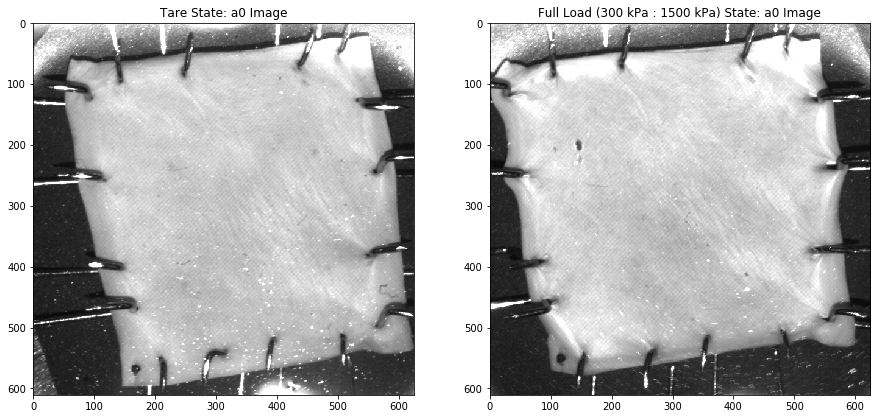

In [6]:
colorlimits = (0, 1)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
tareim = ax0.imshow(tare_a0, cmap='gray')
tareim.set_clim(colorlimits)
ax0.set_title('Tare State: a0 Image')

s40im = ax1.imshow(s40_a0, cmap='gray')
s40im.set_clim(colorlimits)
ax1.set_title('Full Load (300 kPa : 1500 kPa) State: a0 Image');

## Visualize the a2 images

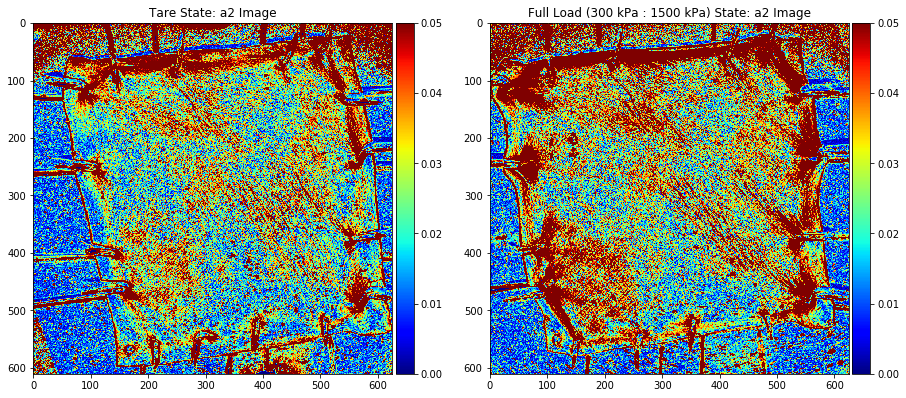

In [7]:
colorlimits = (0, 0.05)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(tare_a2, cmap='jet')
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0)
im0.set_clim(colorlimits)
ax0.set_title('Tare State: a2 Image')

im1 = ax1.imshow(s40_a2, cmap='jet')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1)
im1.set_clim(colorlimits)
ax1.set_title('Full Load (300 kPa : 1500 kPa) State: a2 Image');

## Visualize the a4 images

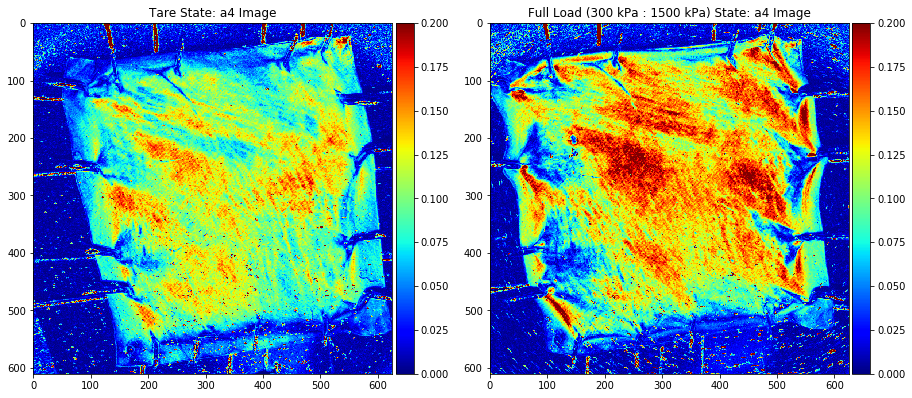

In [8]:
colorlimits = (0, 0.2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(tare_a4, cmap='jet')
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0)
im0.set_clim(colorlimits)
ax0.set_title('Tare State: a4 Image')

im1 = ax1.imshow(s40_a4, cmap='jet')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1)
im1.set_clim(colorlimits)
ax1.set_title('Full Load (300 kPa : 1500 kPa) State: a4 Image');

## Examine changes to I $(\theta)$

### Specify and Illustrate ROI in each image

In [21]:
# Scope appropriate size of ROI in refer and def images
ref_pixel_size = 5
ref_pixel_start = 300

# Experimental F
F = np.array([[1.06, 0],
             [0, 1.06]])

proposed_def_start = F @ np.array([ref_pixel_start, ref_pixel_start])

print('Possible start in def')
print(proposed_def_start)

proposed_def_step = F[0, 0] * ref_pixel_size
print('Possible def step size')
print(proposed_def_step)

# Specify
def_pizel_start = 318
def_pizel_size = 6

Possible start in def
[318. 318.]
Possible def step size
5.300000000000001


### Compute the average values of a0, a2, and a4 from these ROIs

### Compute the resulting double cosine series

### Plot these cosine series together